In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *
from rsna_retro.trainfull3d_labels import *

Loading imports


In [2]:
torch.cuda.set_device(3)

In [3]:
dls = get_3d_dls_aug(Meta.df_comb, sz=128, bs=32, grps=Meta.grps_stg1)

## Model

In [4]:
m = xres3d().cuda()
learn = get_learner(dls, m, get_loss())

In [5]:
learn.add_cb(RowLoss())

In [6]:
# learn.load(f'runs/baseline_stg1_xresnet18-3', strict=False)

In [7]:
name = 'trainfull3d_labels_full3d'

## Training

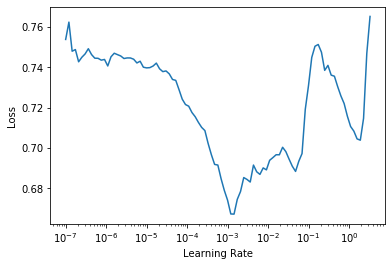

In [8]:
learn.lr_find()

In [16]:
do_fit(learn, 12, 1e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.414778,0.492362,0.799308,0.537037,12:08
1,0.399687,0.534930,0.797200,0.519422,12:08
2,0.341795,0.532073,0.818127,0.658537,12:12
3,0.336902,0.492445,0.813460,0.572267,12:07
4,0.322461,0.405325,0.842066,0.714092,12:05
5,0.314007,0.403703,0.837474,0.694670,12:02
6,0.294721,0.393138,0.851551,0.754291,12:04
7,0.306607,0.397902,0.844625,0.743451,12:07
8,0.279848,0.487974,0.789672,0.603884,12:07
9,0.263155,0.520828,0.775595,0.548329,12:08


In [ ]:
learn.load(f'runs/{name}-1')
learn.dls = get_3d_dls_aug(Meta.df_comb, sz=256, bs=12, grps=Meta.grps_stg1)
do_fit(learn, 12, 1e-3)
learn.save(f'runs/{name}-2')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time


In [ ]:
learn.load(f'runs/{name}-2')
learn.dls = get_3d_dls_aug(Meta.df_comb, sz=384, bs=4, path=path_jpg, grps=Meta.grps_stg1)
do_fit(learn, 4, 1e-4)
learn.save(f'runs/{name}-3')